<a href="https://colab.research.google.com/github/aravind-2599/Product_tracker/blob/retrieve-flipkart-price/ImageSegmentation_car_manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Installing required packages

In [ ]:
pip install ultralytics

##Importing required packages

In [4]:
from ultralytics import YOLO
import torch

In [17]:
import pandas as pd
import cv2
import numpy as np
import os
from os import listdir
from PIL import Image
from google.colab.patches import cv2_imshow

##YOLOv8m-seg Model Training

In [ ]:
model = YOLO("yolov8m-seg.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="/content/sample_data/dataset.yaml", epochs=100)  # train the model
# metrics = model.val()  # evaluate model performance on the validation set
# results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
# path = model.export(format="onnx")  # export the model to ONNX format

In [ ]:
path = model.export(format="onnx")

##Model Evaluation

In [79]:
model.val()

Ultralytics YOLOv8.0.178 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


FileNotFoundError: ignored

##Model Testing

###Model load

In [71]:
model = YOLO("/content/sample_data/best.pt")

In [81]:
test_image_path = "/content/sample_data/sample_dataset/image_126.jpg"

In [82]:
image = cv2.imread(test_image_path)

In [87]:
results = model(test_image_path)
im1 = Image.open("/content/sample_data/sample_dataset/image_126.jpg")
results = model.predict(source=im1, save=True)  # save plotted images


image 1/1 /content/sample_data/sample_dataset/image_126.jpg: 480x640 2 image_boxs, 35.2ms
Speed: 4.0ms preprocess, 35.2ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 image_boxs, 35.0ms
Speed: 2.6ms preprocess, 35.0ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict


In [84]:
bbox_tensor = results[0].boxes.xyxy

In [85]:
bbox_tensor[0]

tensor([467.0736, 117.5538, 820.5480, 518.5412], device='cuda:0')

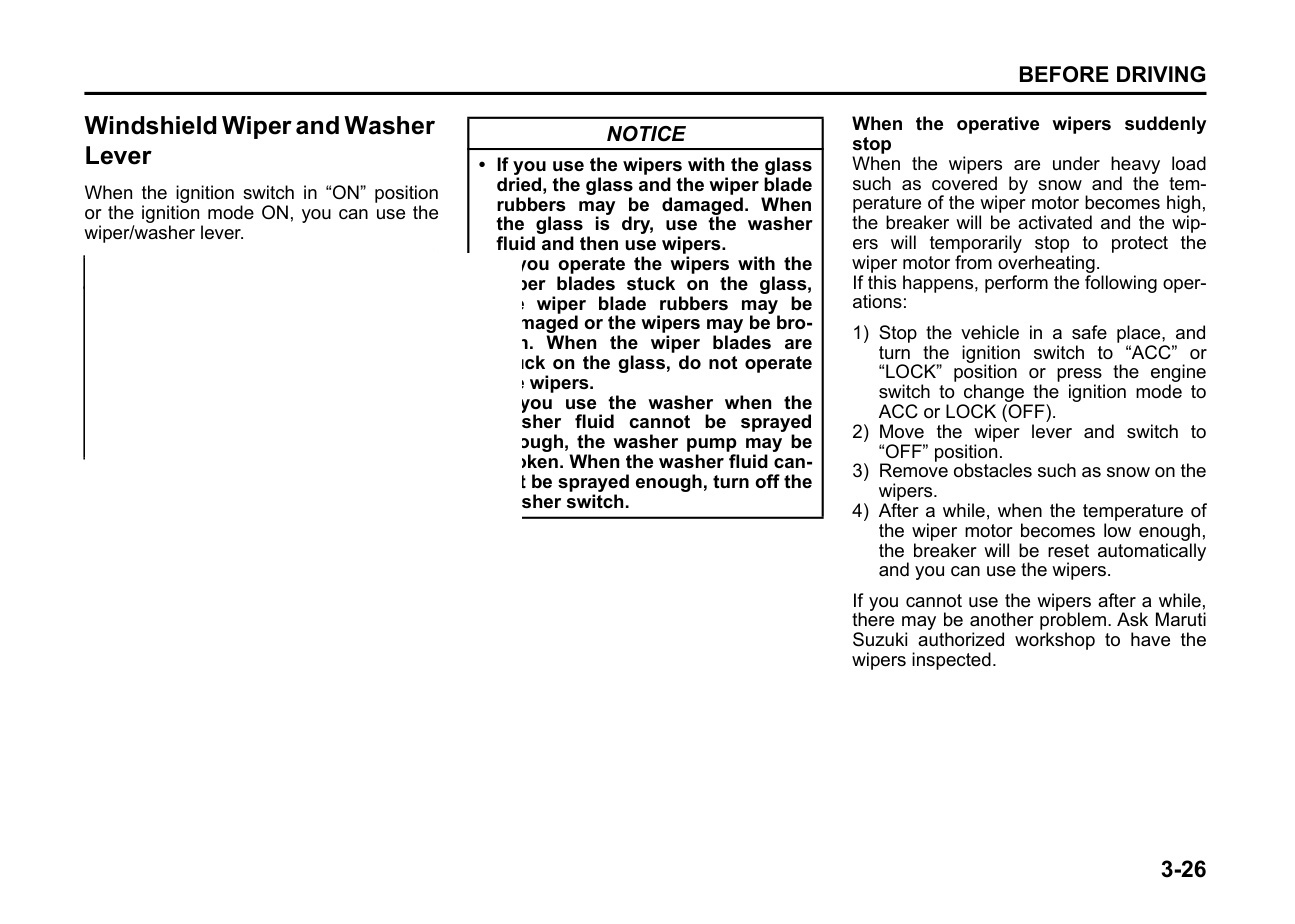

In [86]:
for bbox in bbox_tensor:
    image = cv2.imread("/content/sample_data/sample_dataset/image_126.jpg")
    x, y, width, height = int(bbox[0].item()), int(bbox[1].item()), int(bbox[2].item()), int(bbox[3].item())
    mask = np.zeros_like(image)
    cv2.rectangle(mask, (x, y), (x+width, y+height), (255, 255, 255), thickness=cv2.FILLED)
    masked_image = cv2.bitwise_or(image, mask)
    cv2.imwrite("/content/sample_data/image_126.jpg", masked_image)
    # cv2_imshow(masked_image)
final_img = cv2.imread("/content/sample_data/image_126.jpg")
cv2_imshow(final_img)
/
#     print(x, y, width, height)


image 1/1 /content/sample_data/sample_dataset/image_127.jpg: 480x640 5 image_boxs, 50.6ms
Speed: 10.9ms preprocess, 50.6ms inference, 13.3ms postprocess per image at shape (1, 3, 480, 640)


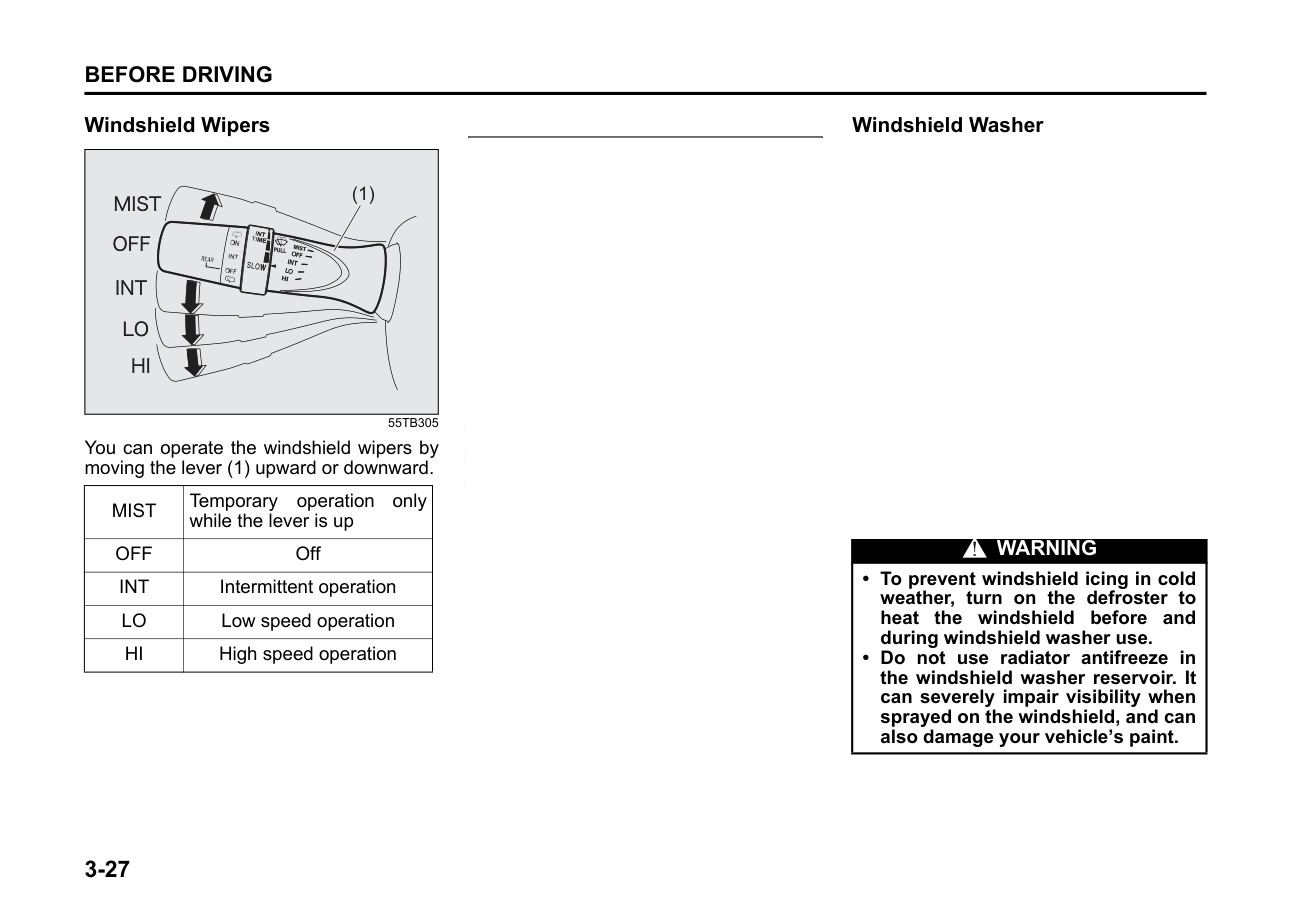

FileNotFoundError: ignored

In [91]:
folder_dir = '/content/sample_data/sample_dataset/'
for image in os.listdir(folder_dir):
  image_path = os.path.join(folder_dir,image)
  # print(image_path)
  img = cv2.imread(image_path)
  results = model(image_path)
  bbox_tensor = results[0].boxes.xyxy
  for bbox in bbox_tensor:
    temp_path = '/content/sample_data/final_images/'
    cv2.imwrite(os.path.join(temp_path, image), img)
    temp_img_path = os.path.join(temp_path,image)
    temp_image = cv2.imread(temp_img_path)
    x, y, width, height = int(bbox[0].item()), int(bbox[1].item()), int(bbox[2].item()), int(bbox[3].item())
    mask = np.zeros_like(temp_image)
    cv2.rectangle(mask, (x, y), (x+width, y+height), (255, 255, 255), thickness=cv2.FILLED)
    masked_image = cv2.bitwise_or(temp_image, mask)
    cv2.imwrite(temp_img_path, masked_image)
    # cv2_imshow(masked_image)
  final_img = cv2.imread(temp_img_path)
  cv2_imshow(final_img)

#     print(x, y, width, height)


  # cv2_imshow(img)
  #   # predict on an image